# DEMAND FORECAST

# OBJECTIVE

1. Demand Analysis from data historical transaction
2. Demand Forecasting for the next 6 months

# IMPORT PACKAGE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import DateOffset
import datetime

# CALLING DATASET

In [2]:
path_dataset = "../phillip morris case code/retail_transaction_data.csv"
df = pd.read_csv(path_dataset)
df.head()

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# DATA QUALITY CHECK

## DATA TYPE

In [3]:
## DATATYPE CHECK
df.dtypes

order_id                object
product_id              object
product_description     object
quantity                 int64
order_date              object
unit_price             float64
customer_id            float64
country                 object
dtype: object

In [4]:
## CHANGE DATATYPE
### customer_id --> string
### order_date --> Timestamp

df['customer_id'] = df['customer_id'].astype(str)
df['order_date'] = pd.to_datetime(df['order_date'])

In [5]:
df.dtypes

order_id                       object
product_id                     object
product_description            object
quantity                        int64
order_date             datetime64[ns]
unit_price                    float64
customer_id                    object
country                        object
dtype: object

## NULL VALUES

In [6]:
df.isnull().sum()

order_id                  0
product_id                0
product_description    4382
quantity                  0
order_date                0
unit_price                0
customer_id               0
country                   0
dtype: int64

In [7]:
df[['product_id', 'product_description']].drop_duplicates()

,product_id,product_description
0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,79323P,PINK CHERRY LIGHTS
2,79323W,WHITE CHERRY LIGHTS
3,22041,"RECORD FRAME 7"" SINGLE SIZE"
4,21232,STRAWBERRY CERAMIC TRINKET BOX
...,...,...
1062371,23090,missing
1063082,85123A,CREAM HANGING HEART T-LIGHT HOLDER
1064015,85175,NaN
1064386,23169,smashed


## DATA DESCRIBE

In [8]:
df.describe()

,quantity,order_date,unit_price
count,1.067371e+06,1067371,1.067371e+06
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04
std,1.727058e+02,NaN,1.235531e+02


Quantity & unit_price have < 0 value

## ORDER CANCEL

In [9]:
df['order_status'] = np.where(df['order_id'].str.startswith('C'), 'CANCEL', 'SALE')

In [10]:
df_os = df.groupby('order_status').agg({'order_id':'nunique'}).reset_index()
df_os['%'] = (df_os['order_id']/df_os['order_id'].sum())*100
df_os

,order_status,order_id,%
0,CANCEL,8292,15.462072
1,SALE,45336,84.537928


# DATASET PREPARATION

- FILTERING
  - exclude order cancel (focused on transaction that generated value)
  - exclude quantity =< 0
  - exclude unit_price =< 0
- ADD COLUMNS
  - Revenue = `quantity` * `unit_price`
  - year_order = Truncate Year of `order_date`
  - year_quarter_order = Truncate Year & Quarter of `order_date`
  - year_month_order = Truncate Year & month `order_date`

In [11]:
## FILTER
df = df[df['order_status'] == 'SALE']
df = df[df['quantity'] > 0]
df = df[df['unit_price'] > 0]
df.head()

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,order_status
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,SALE
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,SALE
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,SALE
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,SALE
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,SALE


In [12]:
## ADD COLUMNS
df['revenue'] = df['quantity'] * df['unit_price']
df['year_order'] = df['order_date'].dt.year
df['year_quarter_order'] = df['order_date'].dt.to_period('Q').dt.to_timestamp()
df['year_month_order'] = df['order_date'].dt.to_period('M').dt.to_timestamp()
df['quarter'] = pd.PeriodIndex(df['order_date'], freq='Q').astype('str')
df.head()

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,order_status,revenue,year_order,year_quarter_order,year_month_order,quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,SALE,83.4,2009,2009-10-01,2009-12-01,2009Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,SALE,81.0,2009,2009-10-01,2009-12-01,2009Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,SALE,81.0,2009,2009-10-01,2009-12-01,2009Q4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,SALE,100.8,2009,2009-10-01,2009-12-01,2009Q4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,SALE,30.0,2009,2009-10-01,2009-12-01,2009Q4


In [13]:
df.dtypes

order_id                       object
product_id                     object
product_description            object
quantity                        int64
order_date             datetime64[ns]
unit_price                    float64
customer_id                    object
country                        object
order_status                   object
revenue                       float64
year_order                      int32
year_quarter_order     datetime64[ns]
year_month_order       datetime64[ns]
quarter                        object
dtype: object

# EDA (Explanatory Data Analysis)

__MAIN METRICS__ :

1. __Revenue__ : quantity * unit_price
2. __Quantity__
3. __Number of customer__ : Number of customer transacted
4. __Average unit price__
5. __Number of Combination Product & country per Bucket__ :

   - bucket = number of months that every combination of demand profile (`product_id` & `country`) have been purchased
   - bucket maximum value is 24 (number of month for 2 years (2010 - 2011))
     
6. __ADI & CV2 for Demand Classification__:

   - __ADI__ :

     - Average Demand Interval --> demand regularity in 1 period.
     - the smaller the more regular
     - minimum value = 1 meaning every demand profile regulary purchased by customer in 1 period perbucket
     - in this case 1 period = 2 years, bucket= month so that 1 period = 24 bucket (month)


   - __CV2__:

     - variation in quantities (demand)
     - the smaller the less variation

   - __Demand Classification__ :

     - source : https://frepple.com/blog/demand-classification/
     - Classifying pattern of the demand into 4 groups :
       1. _Intermittent_ : not Regulary purchased, but have low variation quantity (ADI >= 1.32 and CV² < 0.49)
       2. _Lumpy_ : not Regulary purchased & have high variaton quantity (ADI >= 1.32 and CV² >= 0.49)
       3. _Smooth_ : Regularly purchased & have low variation quantity (ADI < 1.32 and CV² < 0.49)
       4. _Erratic_ : Regularly purchased, but have high variation quantity (ADI < 1.32 and CV² >= 0.49)
       5. ![Demand Classification](https://frepple.com/wp-content/uploads/forecastability-demand-patterns.png)

In [14]:
## AGG Dataset 
df_monthly = df.groupby('year_month_order').agg({'revenue':'sum', 'quantity':'sum', 'customer_id':'nunique'
                                                 , 'unit_price': 'median'}).reset_index().rename(columns={
                                                    'customer_id':'n_customer'})
df_quarterly = df.groupby('year_quarter_order').agg({'revenue':'sum', 'quantity':'sum', 'customer_id':'nunique'
                                                     , 'unit_price': 'median'}).reset_index().rename(columns={
                                                    'customer_id':'n_customer'})

In [15]:
df_monthly['price_growth'] = df_monthly['unit_price'].pct_change()

## Monthly Revenue & Number of Customer

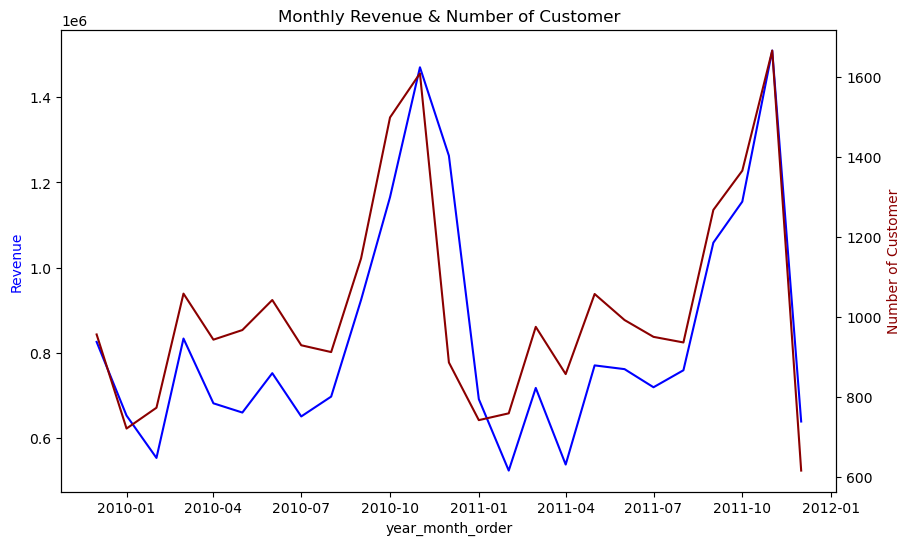

In [16]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_monthly, x='year_month_order', y='revenue', ax=ax1, color='blue')
ax1.set_ylabel('Revenue', color='blue')

ax2=ax1.twinx()
sns.lineplot(data=df_monthly, x='year_month_order', y='n_customer', ax=ax2, color='darkred')
ax2.set_ylabel('Number of Customer', color='darkred')

plt.title('Monthly Revenue & Number of Customer')
plt.show()

In [17]:
df_quarterly['growth_revenue'] = df_quarterly['revenue'].pct_change()
df_quarterly['growth_customer'] = df_quarterly['n_customer'].pct_change()
df_quarterly[df_quarterly['year_quarter_order'].astype('str').isin(['2010-07-01', '2010-10-01', '2011-07-01', '2011-10-01'])][['year_quarter_order', 'revenue', 'n_customer', 'growth_revenue', 'growth_customer']]

,year_quarter_order,revenue,n_customer,growth_revenue,growth_customer
3,2010-07-01,2272320.861,2061,0.085335,0.006348
4,2010-10-01,3898355.182,2671,0.715583,0.295973
7,2011-07-01,2536949.743,2162,0.225530,0.085341
8,2011-10-01,3303286.310,2561,0.302070,0.184551


__INSIGHT__

- Revenue align with number of customer on every month, when the revenue increase, the number of customer also increase in certain month
- Revenue & Number of Customer Always increase Significantly on Q4 in every year (i.e. growth revenue in Q4 2010 = 73% & growth n_customer Q4 2010 = 29.5%), Possibly because of Holiday Season (New Year & Christmas) so People go shopping more often

## Monthly Revenue & Quantity

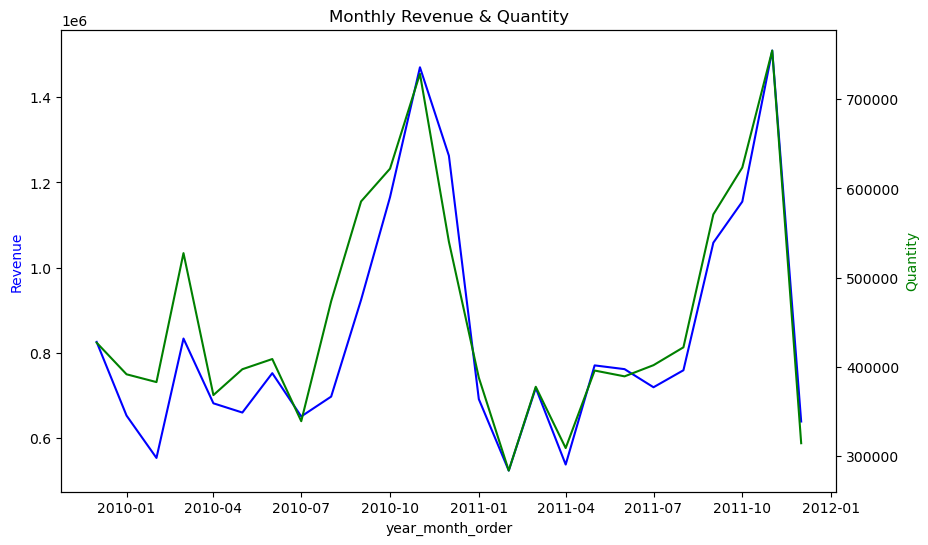

In [18]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_monthly, x='year_month_order', y='revenue', ax=ax1, color='blue')
ax1.set_ylabel('Revenue', color='blue')

ax2=ax1.twinx()
sns.lineplot(data=df_monthly, x='year_month_order', y='quantity', ax=ax2, color='green')
ax2.set_ylabel('Quantity', color='green')

plt.title('Monthly Revenue & Quantity')
plt.show()

In [19]:
df_quarterly['growth_quantity'] = df_quarterly['quantity'].pct_change()

df_quarterly[df_quarterly['year_quarter_order'].astype('str').isin(['2010-07-01', '2010-10-01', '2011-07-01', '2011-10-01'])][['year_quarter_order', 'revenue', 'quantity', 'growth_revenue', 'growth_quantity']]

,year_quarter_order,revenue,quantity,growth_revenue,growth_quantity
3,2010-07-01,2272320.861,1397697,0.085335,0.190502
4,2010-10-01,3898355.182,1890742,0.715583,0.352755
7,2011-07-01,2536949.743,1394349,0.225530,0.274815
8,2011-10-01,3303286.310,1692157,0.302070,0.213582


__INSIGHT__

- Revenue have same fluctuation with quantity on every month, when the revenue increase, the quantity also increase in certain month
- Revenue & Quantity Always increase Significantly on Q4 in every year (i.e. growth revenue in Q4 2010 = 73% & growth quantity Q4 2010 = 35.2%), Possibly because of Holiday Season (New Year & Christmas) so People go shopping more often

## Monthly Quantity & Price

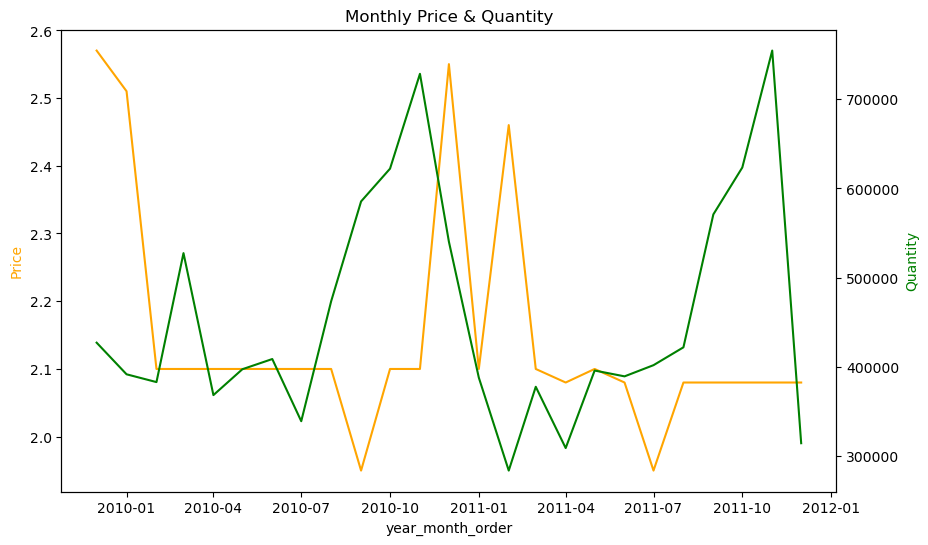

In [20]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_monthly, x='year_month_order', y='unit_price', ax=ax1, color='orange')
ax1.set_ylabel('Price', color='orange')

ax2=ax1.twinx()
sns.lineplot(data=df_monthly, x='year_month_order', y='quantity', ax=ax2, color='green')
ax2.set_ylabel('Quantity', color='green')

plt.title('Monthly Price & Quantity')
plt.show()

## Quantity Relation with Price, Previous Quantity, Previous Price & Growth Price per Year Month Order, Country, Product

In [21]:
df_mcp = df.groupby(['year_month_order', 'year_order','product_id', 'country']).agg({'revenue':'sum', 'quantity':'sum'
                                                                                     , 'unit_price':'median'}).reset_index()
df_mcp['previous_month'] = df['year_month_order'] - DateOffset(months=1)

## JOIN TO PREVIOUS MONTH
df_mcp = \
    pd.merge(df_mcp, df_mcp, how='left'
             , left_on = ['previous_month', 'product_id', 'country']
             , right_on = ['year_month_order', 'product_id', 'country'])\
    .rename(columns = {
                'year_month_order_x' : 'year_month_order'
                , 'year_order_x' : 'year_order'
                , 'revenue_x' : 'revenue'
                , 'quantity_x' : 'quantity'
                , 'unit_price_x' : 'unit_price'
                , 'revenue_y' : 'previous_revenue'
                , 'quantity_y' : 'previous_quantity'
                , 'unit_price_y' : 'previous_unit_price'
    })[['year_month_order', 'year_order','product_id', 'country', 'quantity', 'unit_price', 'revenue','previous_quantity'
        , 'previous_unit_price','previous_revenue']]

df_mcp[['previous_quantity', 'previous_unit_price', 'previous_revenue']] = df_mcp[['previous_quantity'
                                                                                   , 'previous_unit_price'
                                                                                   , 'previous_revenue']].fillna(value=0)


df_mcp['price_growth'] = (df_mcp[df_mcp['previous_unit_price'] > 0]['unit_price']\
                          - df_mcp[df_mcp['previous_unit_price'] > 0]['previous_unit_price'])\
                        /(df_mcp[df_mcp['previous_unit_price'] > 0]['previous_unit_price'])
df_mcp['price_growth'] = df_mcp['price_growth'].fillna(value=0)
    
df_mcp = df_mcp[df_mcp['year_order'].astype('str').isin(['2010', '2011'])]
df_mcp.head()

,year_month_order,year_order,product_id,country,quantity,unit_price,revenue,previous_quantity,previous_unit_price,previous_revenue,price_growth
4643,2010-01-01,2010,10002,Denmark,48,0.850,40.80,0.0,0.0,0.0,0.0
4644,2010-01-01,2010,10002,United Kingdom,243,0.850,208.17,0.0,0.0,0.0,0.0
4645,2010-01-01,2010,10002R,United Kingdom,1,5.060,5.06,0.0,0.0,0.0,0.0
4646,2010-01-01,2010,10120,United Kingdom,32,0.210,6.94,0.0,0.0,0.0,0.0
4647,2010-01-01,2010,10123C,United Kingdom,30,0.965,22.65,0.0,0.0,0.0,0.0


In [22]:
# pd.DataFrame(df_mcp[['quantity', 'unit_price', 'previous_quantity', 'revenue', 'previous_revenue', 'previous_unit_price']].corr()['quantity'])

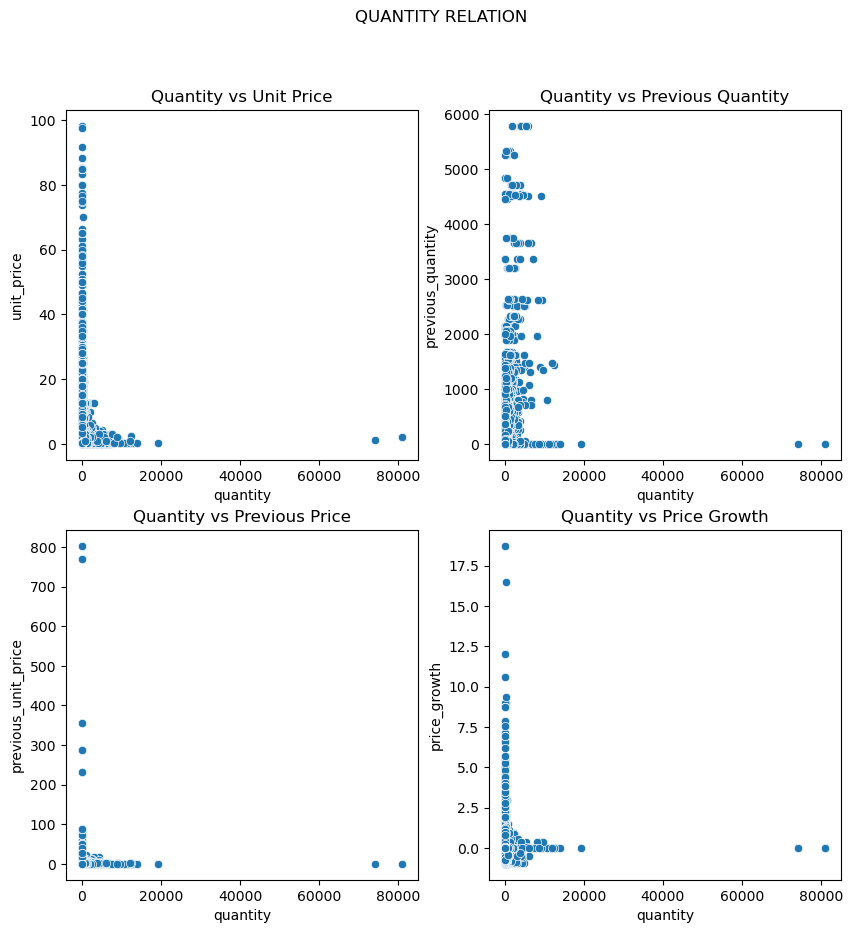

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('QUANTITY RELATION')
plt.subplots_adjust(hspace = 0.2)

## QUANTITY vs PRICE
chart_q1 = sns.scatterplot(ax=axes[0,0] ,data=df_mcp[df_mcp['unit_price'] < 100], x='quantity', y='unit_price')
chart_q1.set_title('Quantity vs Unit Price')

## QUANTITY vs PREVIOUS QUANTITY
chart_q2 = sns.scatterplot(ax=axes[0,1] ,data=df_mcp, x='quantity', y='previous_quantity')
chart_q2.set_title('Quantity vs Previous Quantity')

## QUANTITY vs PREVIOUS PRICE
chart_q3 = sns.scatterplot(ax=axes[1,0] ,data=df_mcp, x='quantity', y='previous_unit_price')
chart_q3.set_title('Quantity vs Previous Price')

## QUANTITY vs GROWTH PRICE
chart_q4 = sns.scatterplot(ax=axes[1,1] ,data=df_mcp, x='quantity', y='price_growth')
chart_q4.set_title('Quantity vs Price Growth')


plt.show()

In [24]:
df_mcp['price_growth'].min()

-0.981629769194536

__INSIGHT__ : 

- Quantity with Price, Previous Price, & Previous Quantity have same pattern in every month, country & products. The higher quantity, the lower price (relatively).
- Most of products would buoght within range 0-4000 quantity for price growth -90% and +150% for every country

## Number of Product & Country per Quantity Category

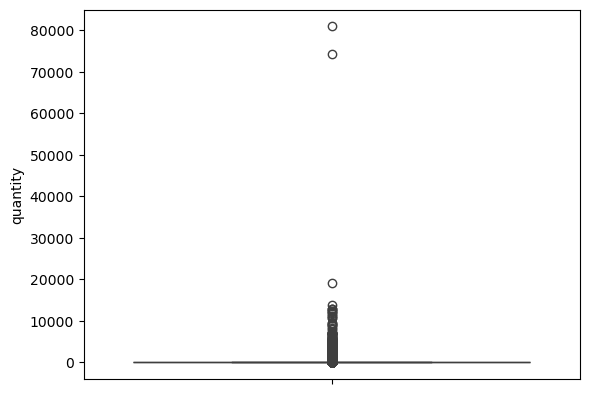

In [25]:
sns.boxplot(df_mcp["quantity"])
plt.show()

In [26]:
df_mcp['qty_category'] = np.where(df_mcp['quantity'] < 50, 'Less than 50 qty'
                        , np.where((df_mcp['quantity'] >= 50) & (df_mcp['quantity'] < 100), 'Between 50 & 100 qty'
                        , np.where((df_mcp['quantity'] >= 100) & (df_mcp['quantity'] < 200), 'Between 100 & 200 qty'
                        , 'Greater than 200 qty')))

df_mcp['product_country'] = df_mcp[['product_id','country']].agg('-'.join, axis=1)

In [27]:
df_mcp_hist_agg = df_mcp.groupby('qty_category').agg({'product_country' : 'nunique'}).reset_index()\
                .rename(columns={'product_country':'n_product_country'})
df_mcp_hist_agg['pct'] = df_mcp_hist_agg['n_product_country']/df_mcp_hist_agg['n_product_country'].sum()

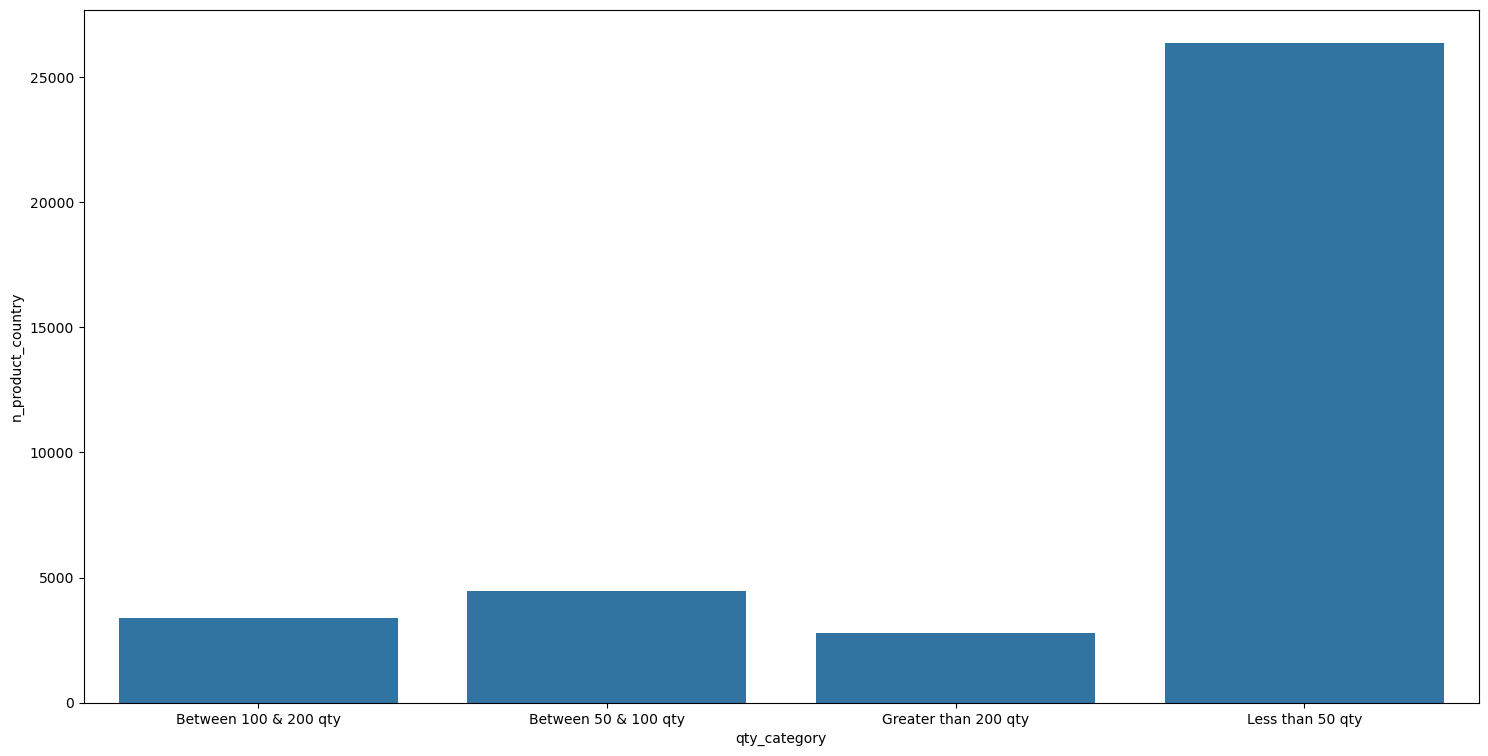

,qty_category,n_product_country,pct
0,Between 100 & 200 qty,3377,0.091297
1,Between 50 & 100 qty,4456,0.120468
2,Greater than 200 qty,2783,0.075239
3,Less than 50 qty,26373,0.712996


In [28]:
plt.subplots(figsize=(18, 9))
sns.barplot(data=df_mcp_hist_agg, x='qty_category', y='n_product_country')
plt.show()

display(df_mcp_hist_agg)

In [29]:
df_mcp

,year_month_order,year_order,product_id,country,quantity,unit_price,revenue,previous_quantity,previous_unit_price,previous_revenue,price_growth,qty_category,product_country
4643,2010-01-01,2010,10002,Denmark,48,0.850,40.80,0.0,0.0,0.0,0.0,Less than 50 qty,10002-Denmark
4644,2010-01-01,2010,10002,United Kingdom,243,0.850,208.17,0.0,0.0,0.0,0.0,Greater than 200 qty,10002-United Kingdom
4645,2010-01-01,2010,10002R,United Kingdom,1,5.060,5.06,0.0,0.0,0.0,0.0,Less than 50 qty,10002R-United Kingdom
4646,2010-01-01,2010,10120,United Kingdom,32,0.210,6.94,0.0,0.0,0.0,0.0,Less than 50 qty,10120-United Kingdom
4647,2010-01-01,2010,10123C,United Kingdom,30,0.965,22.65,0.0,0.0,0.0,0.0,Less than 50 qty,10123C-United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126393,2011-12-01,2011,POST,Norway,1,40.000,40.00,0.0,0.0,0.0,0.0,Less than 50 qty,POST-Norway
126394,2011-12-01,2011,POST,Portugal,14,28.000,392.00,3.0,28.0,84.0,0.0,Less than 50 qty,POST-Portugal
126395,2011-12-01,2011,POST,Spain,1,28.000,28.00,4.0,28.0,112.0,0.0,Less than 50 qty,POST-Spain
126396,2011-12-01,2011,POST,United Kingdom,1,5.290,5.29,0.0,0.0,0.0,0.0,Less than 50 qty,POST-United Kingdom


In [30]:
df_100 = df_mcp[df_mcp['quantity'] >= 100][['product_country']].drop_duplicates()
df_non_100 = df_mcp[df_mcp['quantity'] < 100][['product_country']].drop_duplicates()
df_non_100['n'] = 1

In [31]:
df_cek_100 = pd.merge(df_100, df_non_100, how='left', on= 'product_country')
df_cek_100['n'] = df_cek_100['n'].fillna(value=0)

In [32]:
df_cek_100
# df_cek_200[df_cek_200['qty_category_y'].isnull()].count()['product_country']

,product_country,n
0,10002-United Kingdom,1.0
1,10133-EIRE,1.0
2,10134-EIRE,0.0
3,15034-United Kingdom,1.0
4,15036-United Kingdom,1.0
...,...,...
4382,23569-Netherlands,0.0
4383,23575-United Kingdom,1.0
4384,23576-United Kingdom,1.0
4385,23579-United Kingdom,1.0


In [33]:
df_cek_100[df_cek_100['n']==0].count()['product_country']

709

In [34]:
df_cek_100.count()['product_country']

4387

In [35]:
df_mcp['product_country'].nunique()

27744

In [36]:
df_cek_100.count()['product_country'] / df_mcp['product_country'].nunique()

0.15812427912341406

In [37]:
df_cek_100[df_cek_100['n']==0].count()['product_country'] / df_cek_100.count()['product_country']

0.1616138591292455

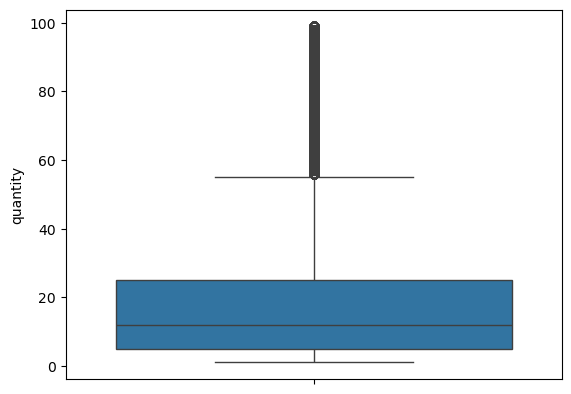

In [38]:
sns.boxplot(df_mcp[df_mcp['quantity'] < 100]['quantity'])
plt.show()

# df_non_200

__INSIGHT__: 

- Quantity columns have so many Outliers
- After categorizing the quantity, combination of Product-Country that have qty < 50 is significantly higher than other
- There are 4387 Product-country (16% from all product-country combination) that have quantity > 100. 84% of the product-country already covered in other quantity category (i.e. Less than 50 qty), Meaning if we want to take out the product-country that have quantity > 100, the 84% of it still can be predicted

## Revenue Contribution per Product in every Year & its dynamic per Quarter (Top 5 Product)

### DEF FUNCTION CHART

In [39]:
def chart_year_quarter_agg (year, agg, metric) : 
    df_product_quarterly = df[df['year_order'] == year].groupby(
        ['year_order', 'quarter', agg]).agg({metric:'sum'}).reset_index()
    data_year = df_product_quarterly.groupby(agg).agg({metric:'sum'}).reset_index()

    fig, axes = plt.subplots(1, 2, figsize=(18, 9))
    fig.suptitle(str(year))

    ## YEAR
    chart_1 = sns.barplot(
        ax=axes[0]
        , x=data_year.sort_values(metric, ascending=False).iloc[0:5][metric]
        , y=data_year.sort_values(metric, ascending=False).iloc[0:5][agg]
        )
    chart_1.bar_label(chart_1.containers[0])
    chart_1.set_title('Top 5 {} with Highest Revenue on {}'.format(agg, year))

    ## Quarter
    chart_2 = sns.lineplot(
        ax=axes[1]
        , data = df_product_quarterly[
            (df_product_quarterly[agg].isin(list(data_year.sort_values(metric, ascending=False).iloc[0:5][agg])))
            & 
            (df_product_quarterly['year_order'] == year)
            ]
        , x = 'quarter'
        , y= metric
        , hue = agg
    )
    chart_2.set_title('Top 5 {} with Highest Revenue on {} per Quarter'.format(agg, year))
    
    plt.show()

### CHART

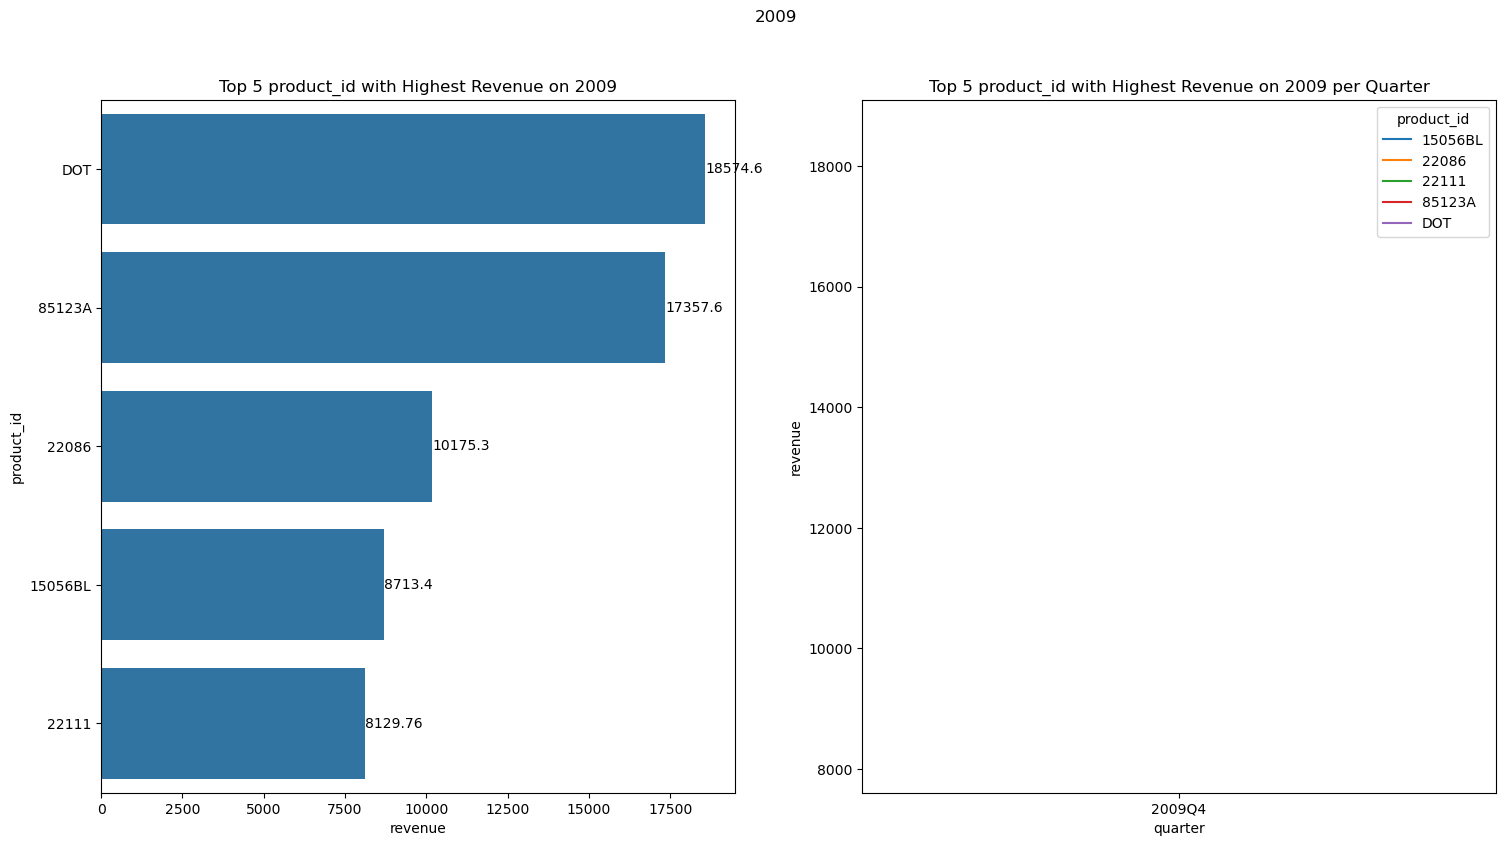

None


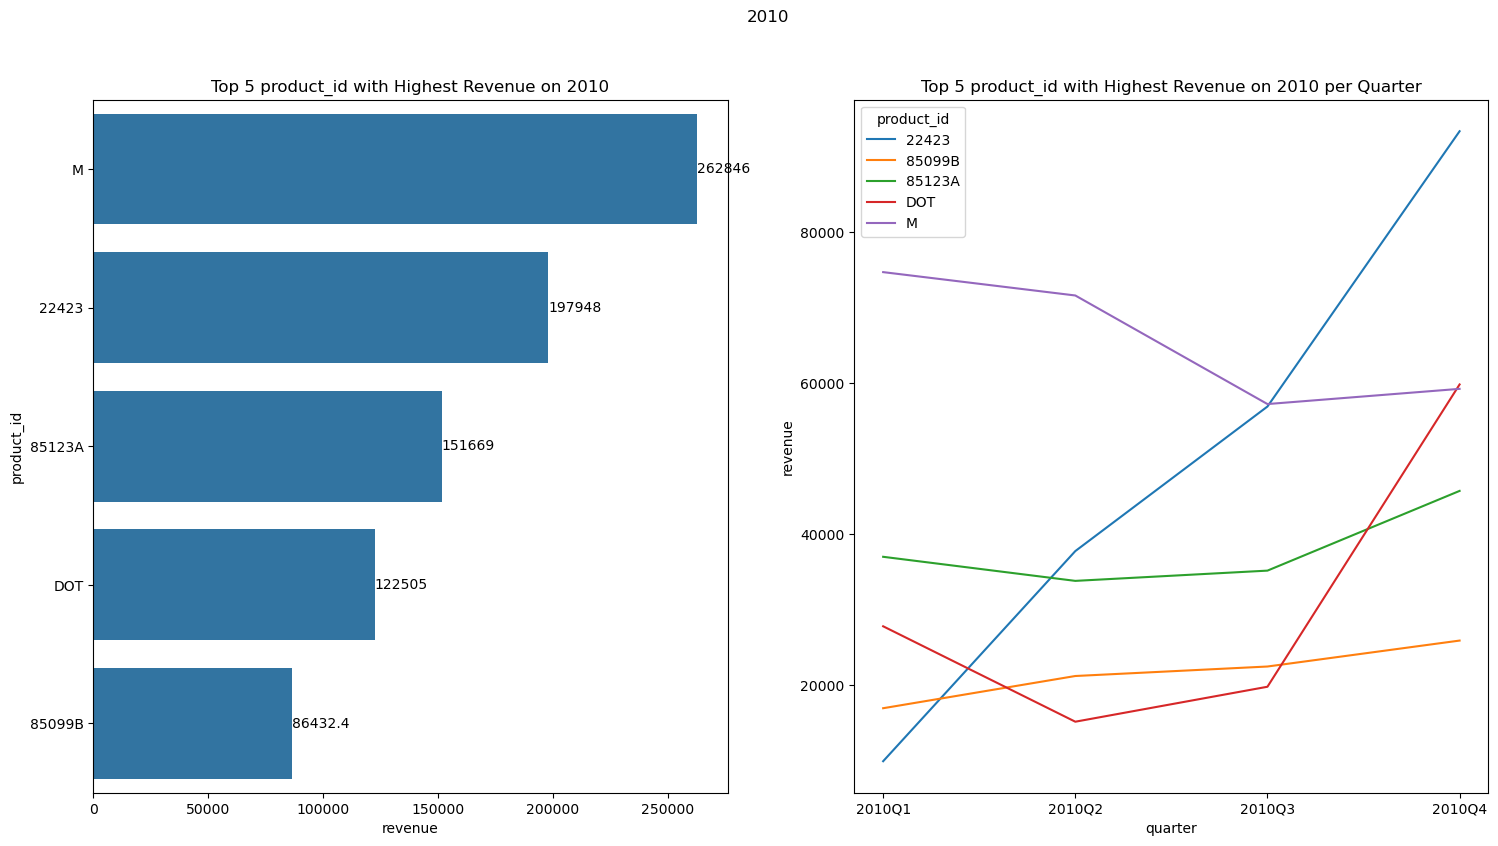

None


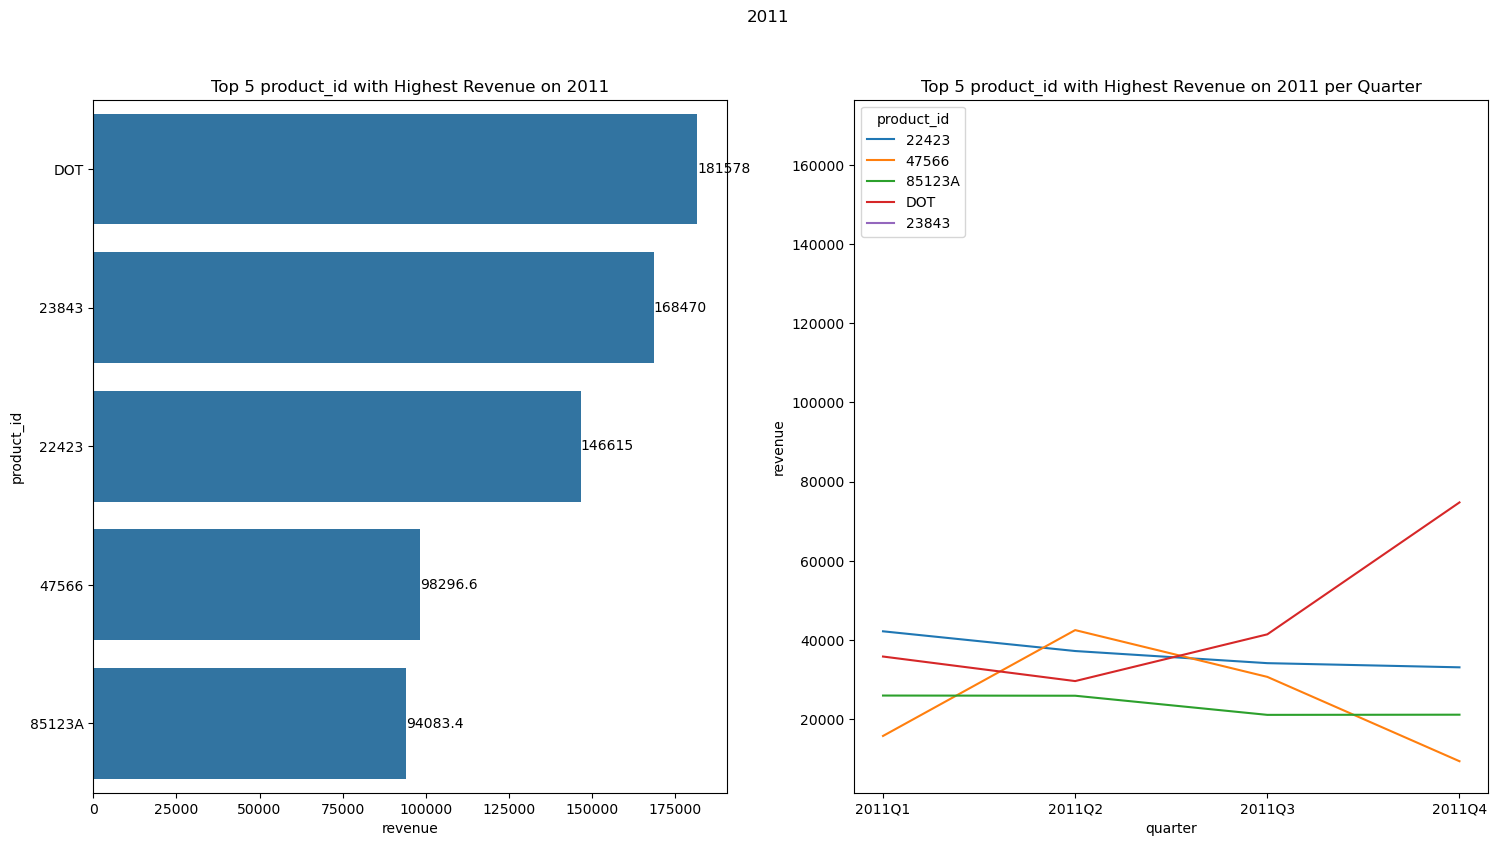

None


In [40]:
for i in list(df['year_order'].unique()) : 
    print(chart_year_quarter_agg (i, 'product_id', 'revenue'))

In [41]:
df[
    df['product_id'].isin(['DOT', '85123A', '22423'])
][['product_id', 'product_description']].drop_duplicates()

,product_id,product_description
102,85123A,WHITE HANGING HEART T-LIGHT HOLDER
2379,DOT,DOTCOM POSTAGE
124243,22423,REGENCY CAKESTAND 3 TIER
1063082,85123A,CREAM HANGING HEART T-LIGHT HOLDER


__INSIGHT__ : 

- product_id DOT (__DOTCOM POSTAGE__) & 85123A (__HANGING HEART T-LIGHT HOLDER__) always purchased by customer in every year. Those products always contribute with high revenue (Top 5 Products). On 2009 the products gave almost 36,000 GBP and the number always increase every year up to 275,000 GBP in 2011, especially for __DOTCOM POSTAGE__ Product with 20% Growth from 2010 to 2011
- On 2009 the transaction only happen in December, so that the trend data is not showing anything,  with total revenue roughly 825,000 GBP
- Revenue for product_id 22423 (__REGENCY CAKESTAND 3 TIER__) always increase significantly every quarter on 2010.
- All Top 5 Product in 2011 have revenue that tends to be more stable every quarter

## Revenue Contribution per Country in every Year & its dynamic per Quarter (Top 5 Country)

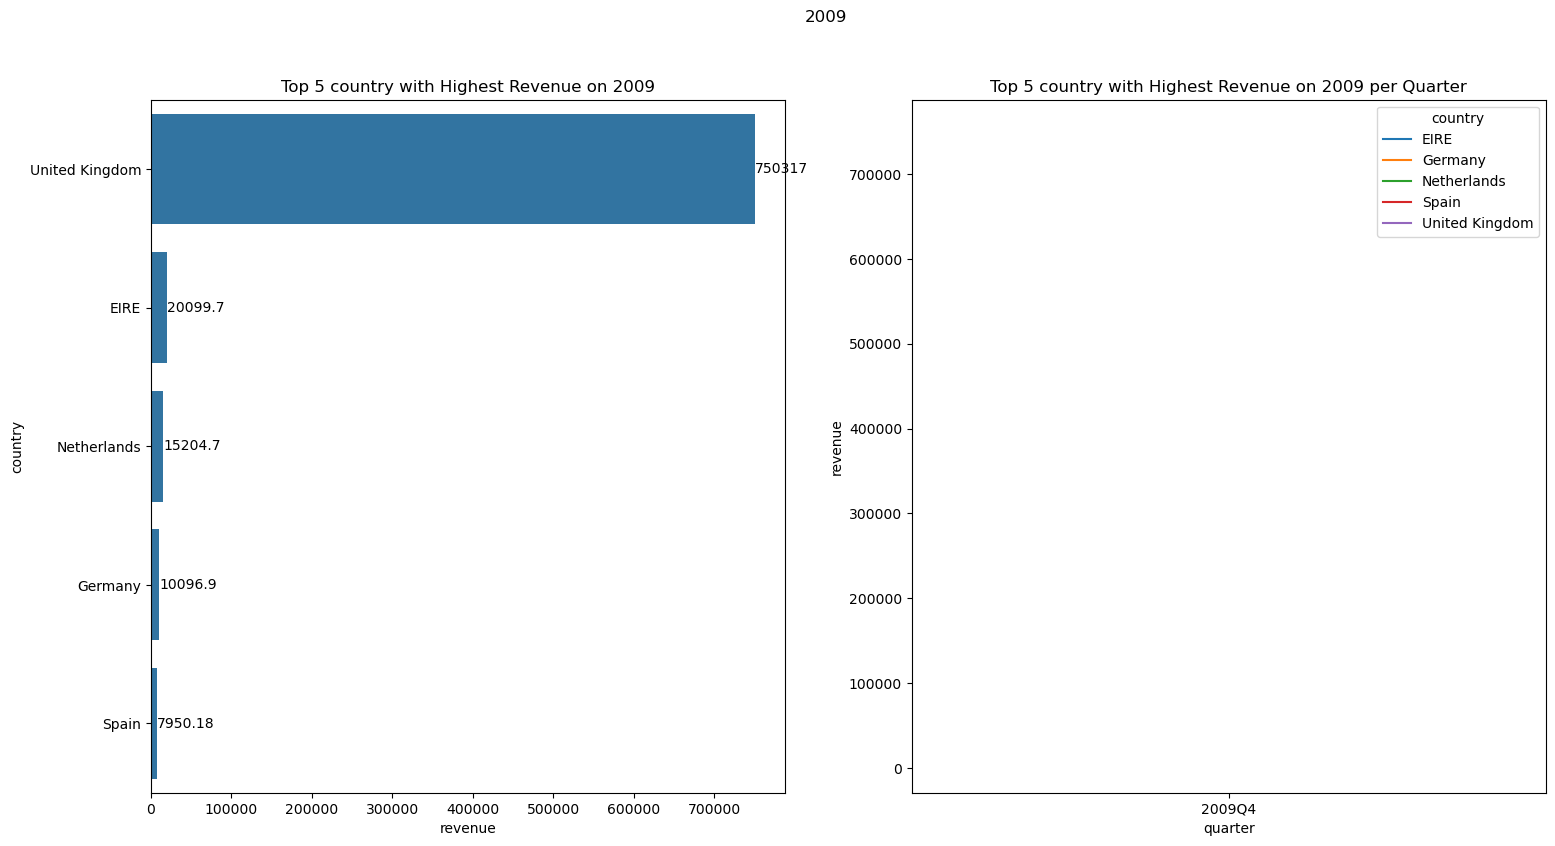

None


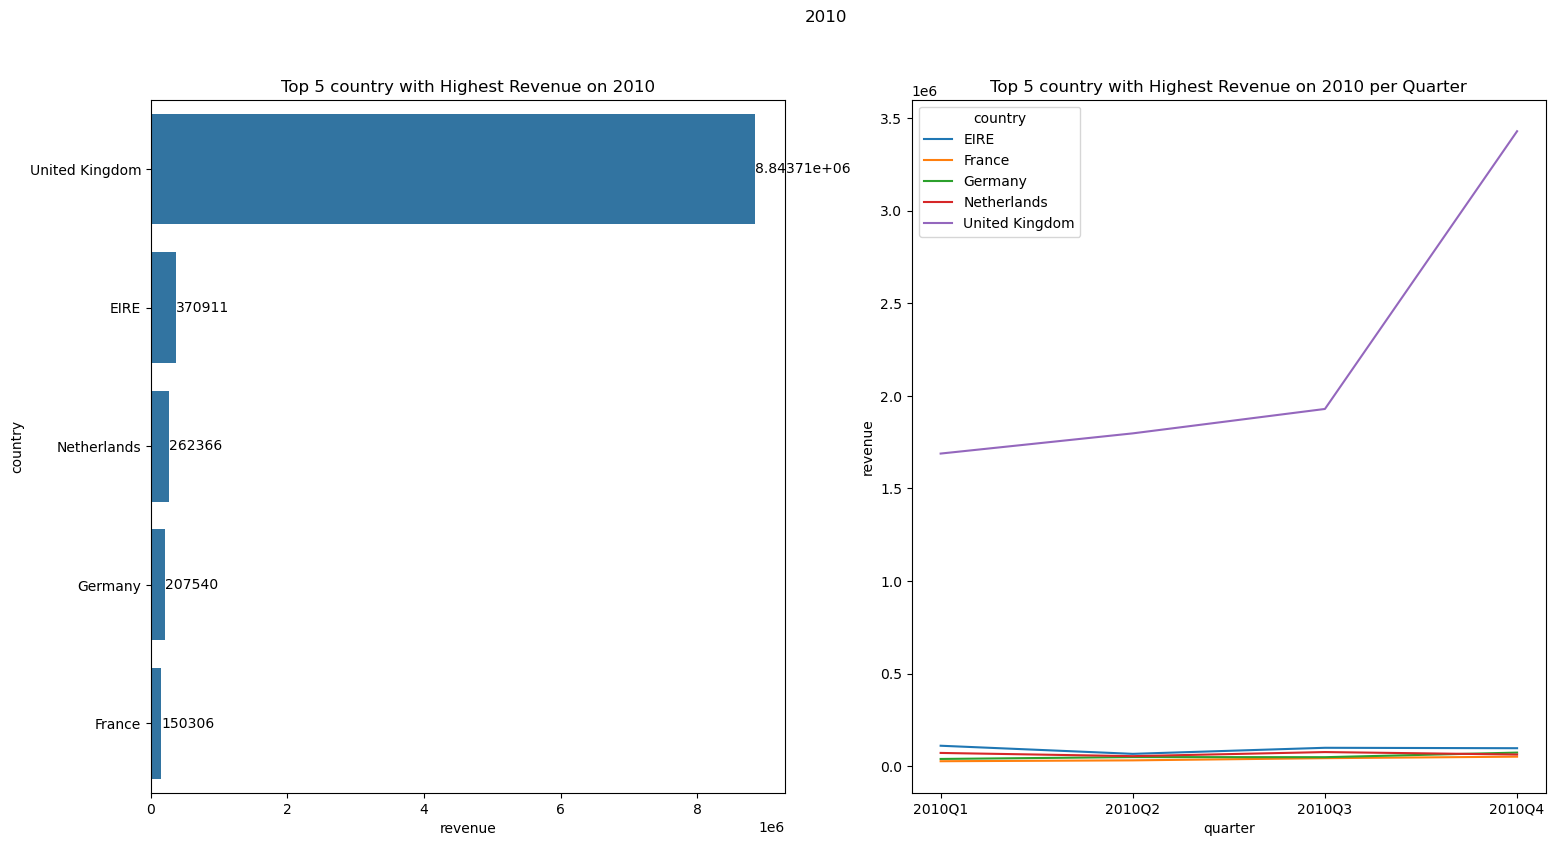

None


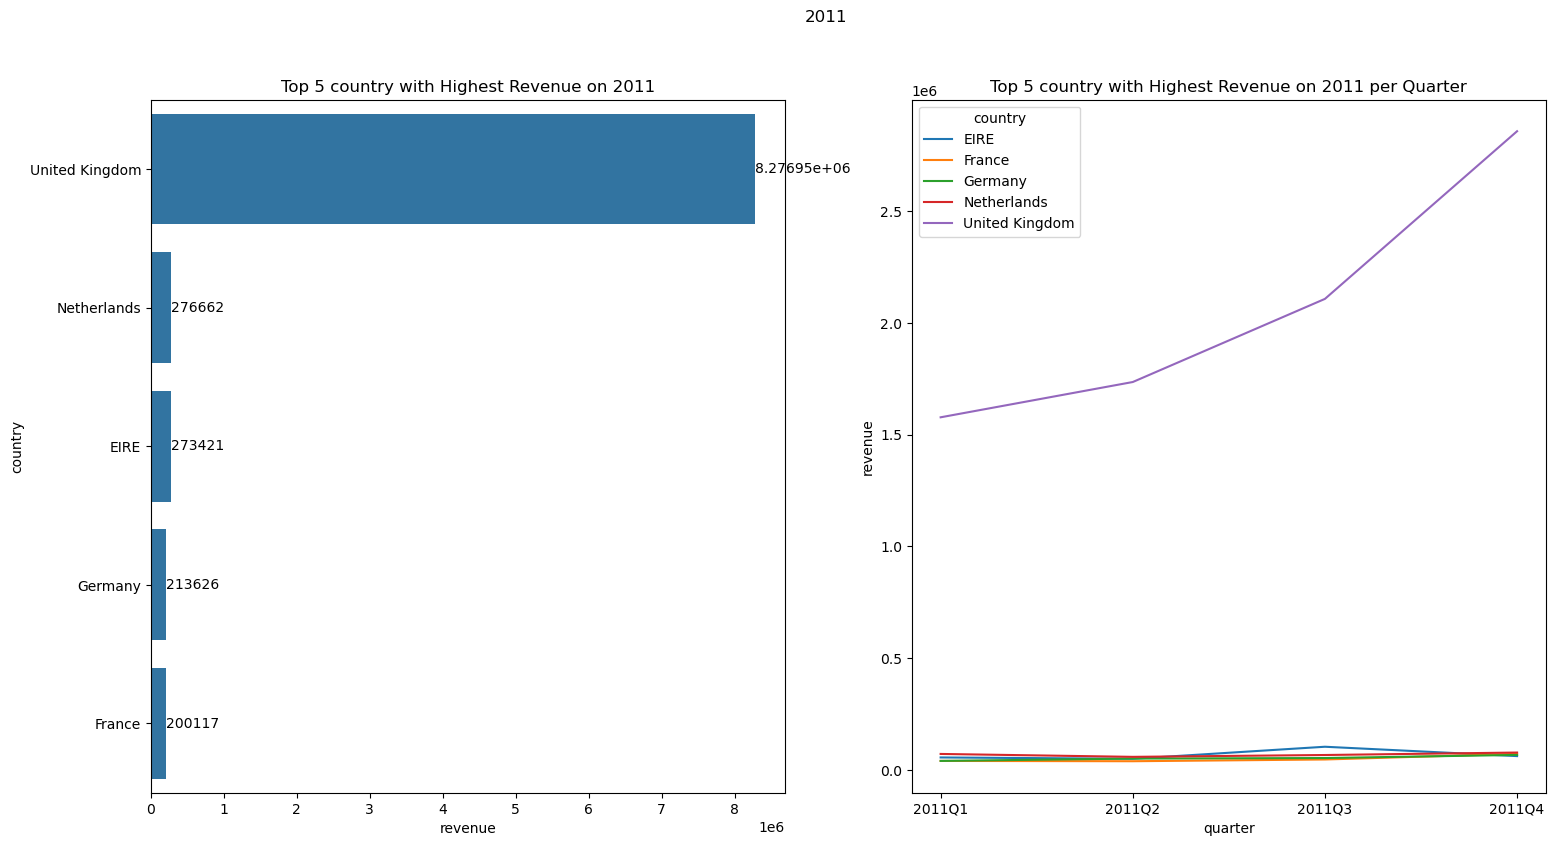

None


In [42]:
for i in list(df['year_order'].unique()) : 
    print(chart_year_quarter_agg (i, 'country', 'revenue'))

__INSIGHT__

- UK always significantly have the highest revenue on every year. On 2009 UK revenue 750,317 GBP, Increased on 8,800,000 GBP on 2010. 2011 UK revenue is 8,300,000 GBP
- EIRE (Ireland), Netherlands, Germany and France always on TOP 5 country that have high contribution on Revenue besides UK.
- UK Revenue Always increasin on every quarter from 2010 until 2011. On the other hand, other Top 5 countries relatively stagnan on every quarter.

## Price Growth Monthly per Country (TOP 5 country that countribute the most Revenue)

In [43]:
top_5_country_all_time = list(df.groupby('country').agg({'revenue': 'sum'}).reset_index().sort_values('revenue', ascending=False).iloc[0:5]['country'])

In [44]:
df_mc_growth = df_mcp[df_mcp['previous_unit_price']>0].groupby(['year_month_order', 'country'])\
            .agg({'price_growth':'mean'}).reset_index()

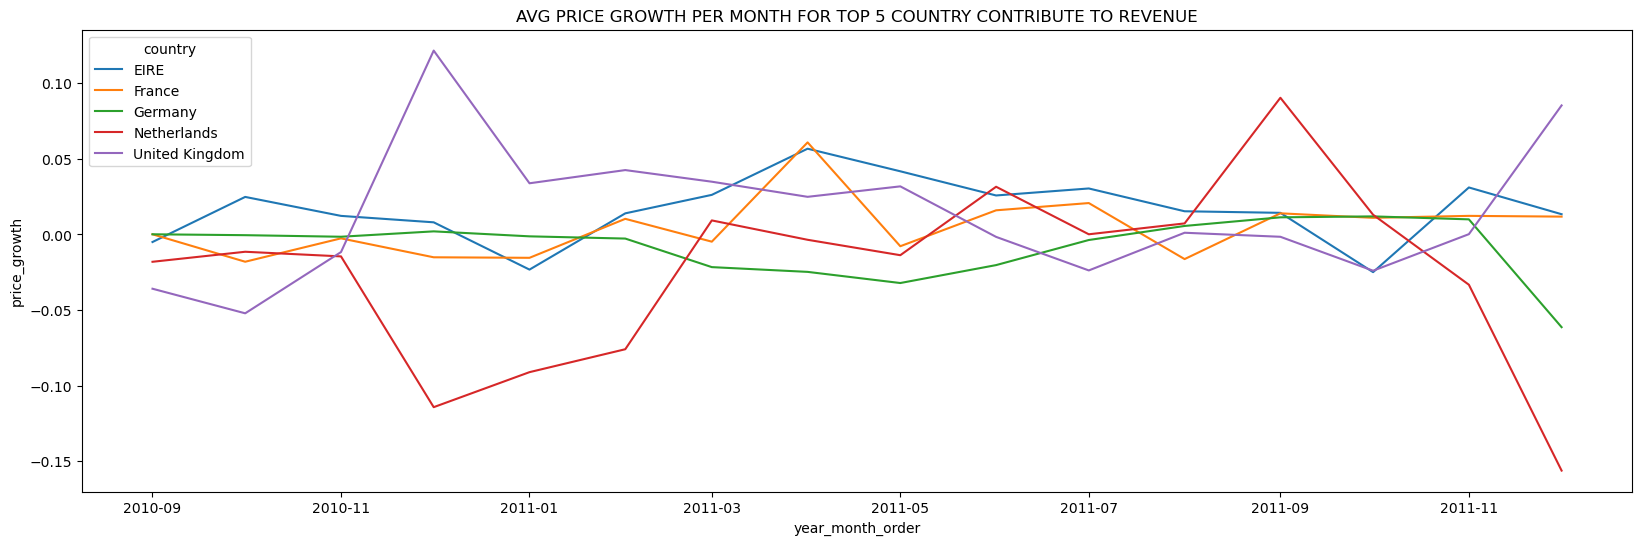

In [45]:
plt.subplots(figsize=(20, 6))
plt.title('AVG PRICE GROWTH PER MONTH FOR TOP 5 COUNTRY CONTRIBUTE TO REVENUE')
sns.lineplot(
        data=df_mc_growth[df_mc_growth['country'].isin(top_5_country_all_time)]
        , x='year_month_order', y='price_growth', hue='country')
plt.show()

__INSIGHT__ : 

- Price for UK (Country that contribute the most to revenue) doesnt have a large number of price growth (in average of all products) for every month. the number of growth around +- 5%, Likewise the other 3 Countries (Germany, France and Ireland)
- Netherlands have a significant fluctuation of price growth in every month (in average of all products). the number is in range +10% and -15%.

## Monthly Revenue for Top 5 Product in UK

In [46]:
## BASE
df_uk = df[df['country'] == 'United Kingdom'].groupby([
        'product_id', 'year_month_order', 'year_order']).agg({'revenue':'sum'}).reset_index()

## FIND TOP 5 Per Year
df_uk_year = df[df['country'] == 'United Kingdom'].groupby(['product_id', 'year_order']).agg({'revenue':'sum'}).reset_index()
df_uk_year['rank'] = df_uk_year.sort_values('revenue', ascending=False).groupby('year_order').cumcount()+1
df_uk_year = df_uk_year[df_uk_year['rank'] <= 5]

In [47]:
df_uk_merge = pd.merge(df_uk, df_uk_year, how='inner', on=['year_order', 'product_id'])\
.rename(columns={'revenue_x':'revenue'})[['year_month_order', 'product_id', 'revenue']]

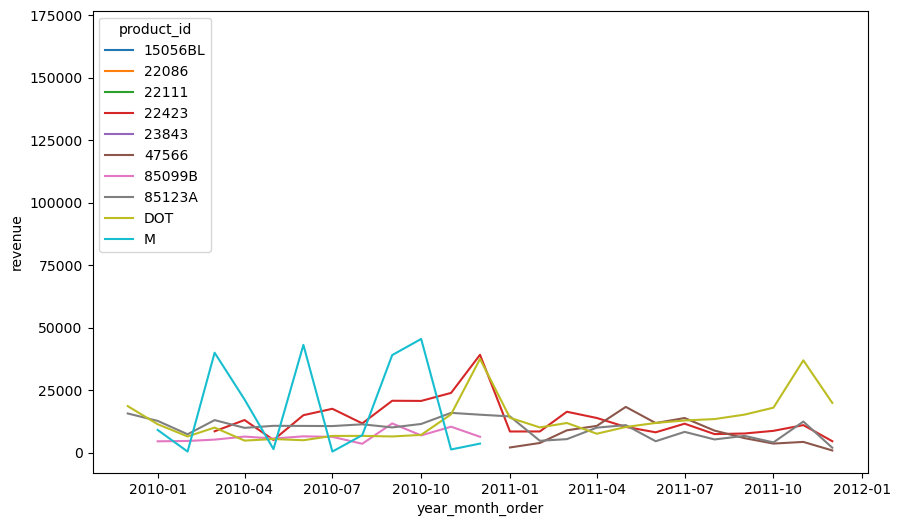

In [48]:
plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_uk_merge, x='year_month_order', y='revenue', hue='product_id')
plt.show()

In [49]:
df[
    df['product_id'].isin(['DOT', '85123A', '22423', 'M', '85099B', '47566'])
][['product_id', 'product_description']].drop_duplicates()

,product_id,product_description
102,85123A,WHITE HANGING HEART T-LIGHT HOLDER
161,85099B,JUMBO BAG RED WHITE SPOTTY
1329,47566,PARTY BUNTING
2379,DOT,DOTCOM POSTAGE
2697,M,Manual
124243,22423,REGENCY CAKESTAND 3 TIER
147418,85099B,RED RETROSPOT JUMBO BAG
198020,85099B,JUMBO BAG RED RETROSPOT
1063082,85123A,CREAM HANGING HEART T-LIGHT HOLDER


__INSIGHT__ : 

- DOT (__DOTCOM POSTAGE__), 85123A (__HANGING HEART T-LIGHT HOLDER__) & 22423 (__REGENCY CAKESTAND 3 TIER__) always on demand every month from 2010 until 2011 in UK that contribute with High revenue (Top 5)
- M (__MANUAL__) & 85099B (__JUMBO BAG__) products are contributing with high revenue in UK (Top 5) on 2010, but on 2011 those products not in Top 5
- 47566 (__PARTY BUNTING__) product not on TOP 5 product that contribute with high revenue in UK, but on 2011 these product on Top 5 that contribute with high revenue on every month
- __DOTCOM POSTAGE__ Product give the Highest revenue on the end of the year from 2010 to 2011 in UK with value around 37,000 GBP each

## Number of Combination Product & country per Bucket

- Find if every month (consecutively) from 2010 to 2011 there is any transaction for every combination of `product_id` & `country`
- bucket = number of months that every combination of demand profile (`product_id` & `country`) have been purchased
- bucket maximum value is 24 (number of month for 2 years (2010 - 2011)) 
- this metric is importent for time series modelling (demand forecasting)
- source : https://frepple.com/blog/demand-classification/
- Only use transaction from 2010 - 2011 because on 2009 there is only one month (December)

In [50]:
## BUCKET
df_bucket = df[df['year_order'].astype('str').isin(['2010', '2011'])]\
.groupby(['product_id', 'country', 'year_month_order']).agg({'quantity' : 'sum'}).reset_index()
df_bucket['is_have_trx'] = np.where(df_bucket['quantity'] > 0, 1, 0)
df_bucket['product_country'] = df_bucket[['product_id','country']].agg('-'.join, axis=1)
df_bucket = df_bucket[['product_country', 'year_month_order', 'quantity', 'is_have_trx']]

## BUCKET GROUP
df_bucket_group = df_bucket.groupby(['product_country']).agg({'is_have_trx' : 'sum'}).reset_index()\
                .rename(columns = {'is_have_trx' : 'number_of_bucket'})
df_bucket_group['rank_product_country'] = df_bucket_group.sort_values('product_country', ascending=False)\
                .groupby('number_of_bucket').cumcount()+1

# ## BUCKET GROUP AGG
df_bucket_group_agg_1 = df_bucket_group.groupby('number_of_bucket')\
                        .agg({'product_country' : 'nunique'})\
                        .rename(columns = {'product_country':'n_product_country'})\
                        .reset_index()
df_bucket_group_agg_2 = df_bucket_group[df_bucket_group['rank_product_country']<=4]\
                        .groupby('number_of_bucket', as_index=False)['product_country']\
                        .agg(lambda x: ', '.join(map(str, set(x))))
df_bucket_group_agg = pd.merge(df_bucket_group_agg_1, df_bucket_group_agg_2, how='left', on ='number_of_bucket')

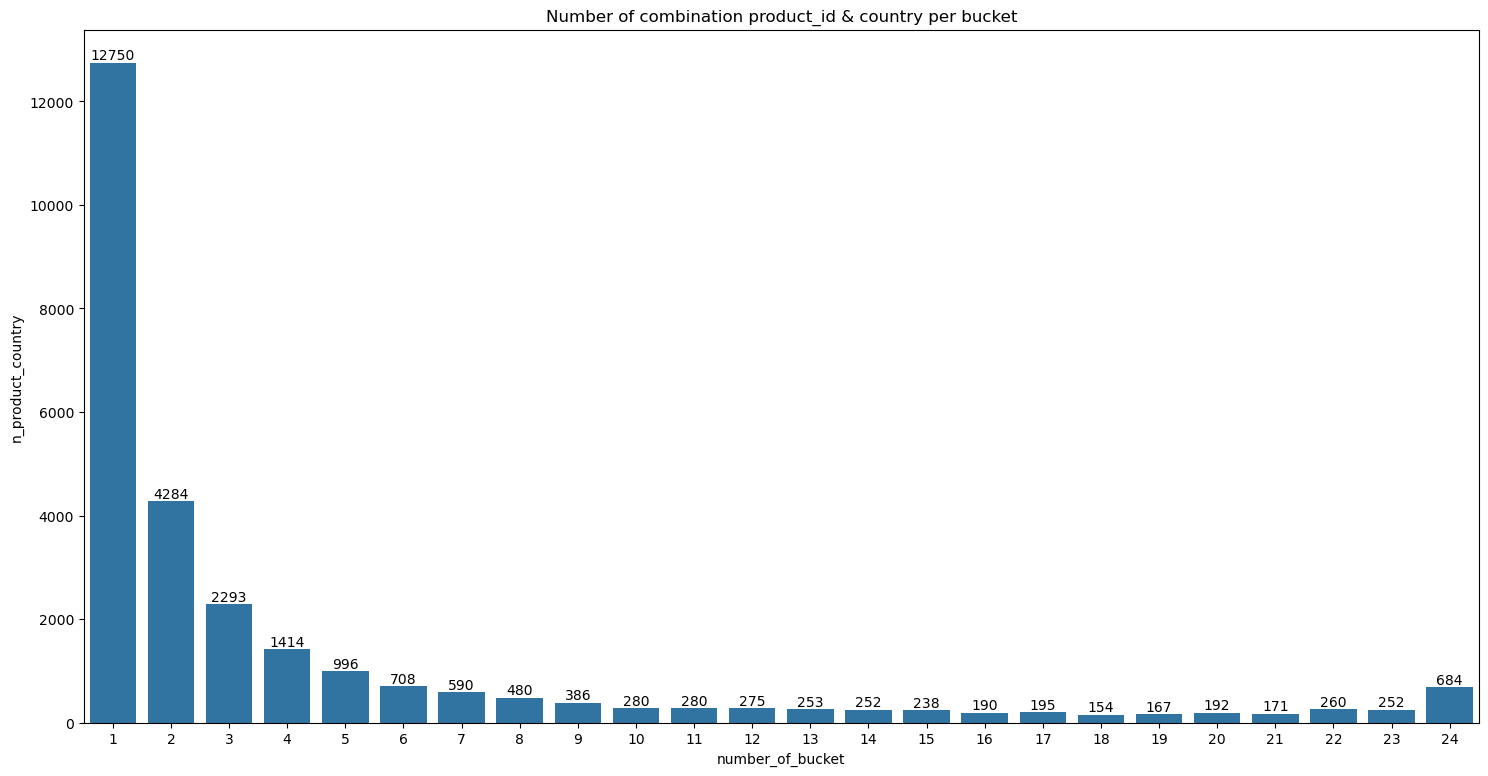

In [51]:
plt.subplots(figsize=(18, 9))

chart_a = sns.barplot(data=df_bucket_group_agg, x='number_of_bucket', y='n_product_country')
chart_a.bar_label(chart_a.containers[0])
chart_a.set_title('Number of combination product_id & country per bucket')

plt.show()

In [52]:
df_show = df_bucket_group_agg [['number_of_bucket', 'n_product_country', 'product_country']]\
.sort_values('number_of_bucket', ascending=False)

pd.set_option("display.max_colwidth", 2000)
display(df_show)
print(df_show['n_product_country'].sum())

,number_of_bucket,n_product_country,product_country
23,24,684,"POST-Spain, POST-Germany, POST-France, POST-Belgium"
22,23,252,"90214D-United Kingdom, 90200E-United Kingdom, 90200D-United Kingdom, 90214K-United Kingdom"
21,22,260,"90201B-United Kingdom, POST-Netherlands, 90201D-United Kingdom, 90214A-United Kingdom"
20,21,171,"90214E-United Kingdom, POST-Sweden, POST-Switzerland, C2-United Kingdom"
19,20,192,"90214N-United Kingdom, 90214J-United Kingdom, 90214G-United Kingdom, 90214S-United Kingdom"
18,19,167,"POST-Portugal, 90214M-United Kingdom, 90197B-United Kingdom, POST-United Kingdom"
17,18,154,"90214L-United Kingdom, 90192-United Kingdom, 90206C-United Kingdom, 90214H-United Kingdom"
16,17,195,"90214R-United Kingdom, 90184B-United Kingdom, 90208-United Kingdom, POST-Finland"
15,16,190,"BANK CHARGES-United Kingdom, 90214V-United Kingdom, POST-Austria, 90214B-United Kingdom"
14,15,238,"90200C-United Kingdom, 90214P-United Kingdom, 90186B-United Kingdom, 90204-United Kingdom"


27744


__INSIGHT__ : 

1. There Are __685 Product & Country Combination (around 2.5% from all combination)__ that routinly purchased by customers every month from 2010 until 2011. In example __Product POST in Germany, Product POST in Spain, etc.__
2. Bucket 1 have the highest value compare to others (12750) which means there are __12750 Product & Country Combination__ that only in one month purchased by customer from 2010 until 2011, i.e. __Product gift_0001_70 in UK, POST in Canada, etc.__
3. Possibly only in point(1) that can be use for Demand Forecasting

## Demand Classification (using ADI & CV2)

In [53]:
df_bucket_stat = df_bucket.groupby('product_country').agg({'is_have_trx' : 'sum', 'quantity':['std', 'mean']}).reset_index()
df_bucket_stat.columns = ['_'.join(col).strip() for col in df_bucket_stat.columns.values]
df_bucket_stat = df_bucket_stat.rename(columns={'product_country_' : 'product_country', 'is_have_trx_sum' : 'bucket'})

## COUNT ADI & CV
df_bucket_stat['ADI'] = 24/df_bucket_stat['bucket']
df_bucket_stat['CV2'] = df_bucket_stat['quantity_std'] / df_bucket_stat['quantity_mean']
df_bucket_stat['CV2'] = df_bucket_stat['CV2'].fillna(value=df_bucket_stat['CV2'].max())

## DEMAND CLASSIFICATION
df_bucket_stat['demand_class'] = np.where((df_bucket_stat['ADI'] < 1.32) & (df_bucket_stat['CV2'] < 0.49), 'SMOOTH'
                                , np.where((df_bucket_stat['ADI'] >= 1.32) & (df_bucket_stat['CV2'] < 0.49), 'INTERMITTENT'
                                , np.where((df_bucket_stat['ADI'] < 1.32) & (df_bucket_stat['CV2'] >= 0.49), 'ERRATIC'
                                , np.where((df_bucket_stat['ADI'] >= 1.32) & (df_bucket_stat['CV2'] >= 0.49), 'LUMPY', np.nan))))

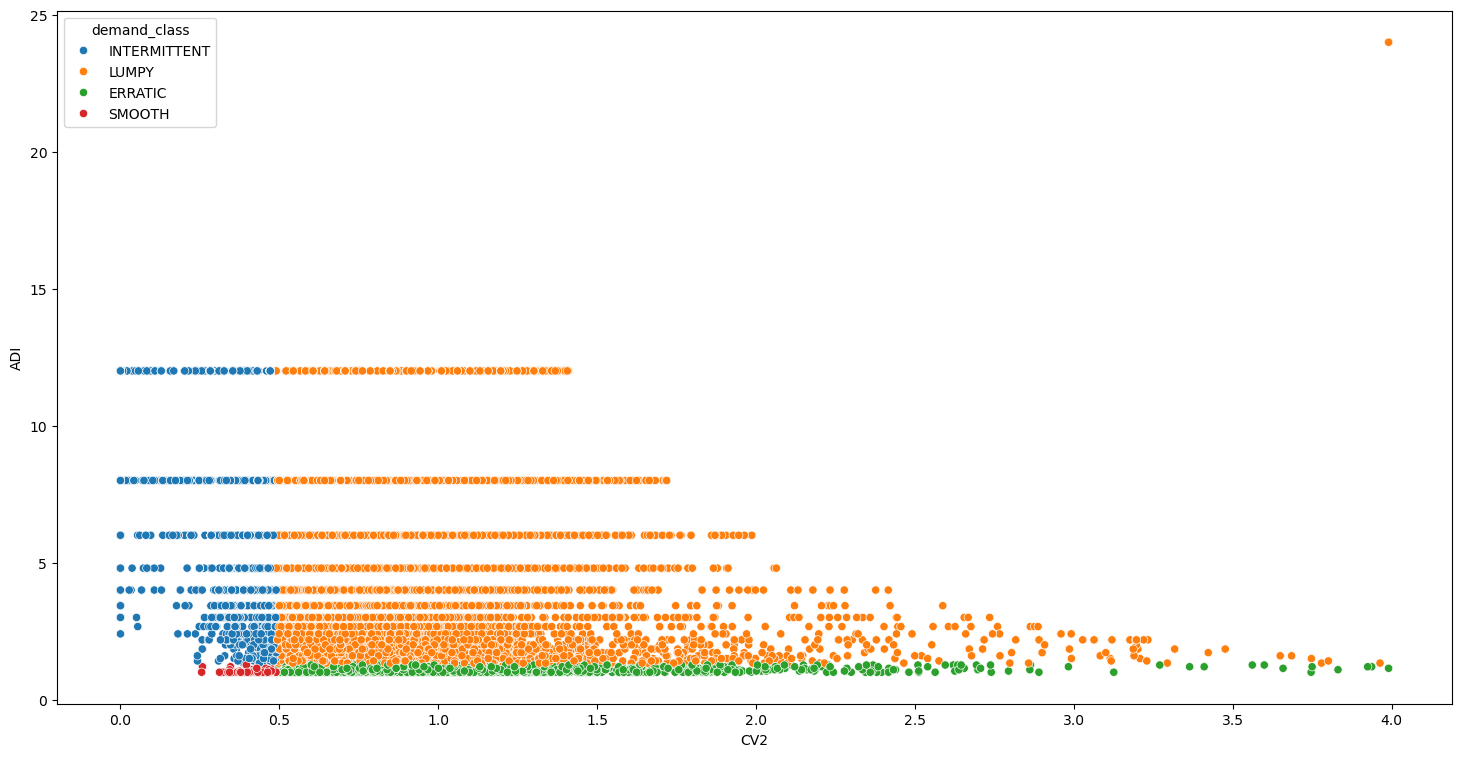

In [54]:
plt.subplots(figsize=(18, 9))

sns.scatterplot(data=df_bucket_stat, x='CV2', y='ADI', hue='demand_class')
plt.show()

In [55]:
df_bucket_stat_agg = df_bucket_stat.groupby('demand_class').agg({'product_country' : 'nunique'}).reset_index()
df_bucket_stat_agg['pct'] = df_bucket_stat_agg['product_country']/df_bucket_stat_agg['product_country'].sum()

In [56]:
display(df_bucket_stat_agg)
print(df_bucket_stat_agg['product_country'].sum())

,demand_class,product_country,pct
0,ERRATIC,1607,0.057922
1,INTERMITTENT,6012,0.216696
2,LUMPY,20006,0.721093
3,SMOOTH,119,0.004289


27744


In [57]:
## Join to main table df_bucket
df_bucket_all = pd.merge(df_bucket, df_bucket_stat, how='left', on='product_country')
df_bucket_all.head()

,product_country,year_month_order,quantity,is_have_trx,bucket,quantity_std,quantity_mean,ADI,CV2,demand_class
0,10002-Australia,2010-03-01,12,1,2,8.485281,18.000000,12.0,0.471405,INTERMITTENT
1,10002-Australia,2010-10-01,24,1,2,8.485281,18.000000,12.0,0.471405,INTERMITTENT
2,10002-Denmark,2010-01-01,48,1,3,95.442828,90.666667,8.0,1.052678,LUMPY
3,10002-Denmark,2010-04-01,200,1,3,95.442828,90.666667,8.0,1.052678,LUMPY
4,10002-Denmark,2010-11-01,24,1,3,95.442828,90.666667,8.0,1.052678,LUMPY


In [58]:
df_bucket_all.groupby(['product_country', 'demand_class']).agg({'quantity':'sum'})\
.reset_index().sort_values('quantity', ascending=False)

,product_country,demand_class,quantity
23644,84077-United Kingdom,ERRATIC,98746
26318,85099B-United Kingdom,SMOOTH,85485
26434,85123A-United Kingdom,SMOOTH,82686
9272,22197-United Kingdom,ERRATIC,82263
21253,23843-United Kingdom,LUMPY,80995
...,...,...,...
20186,23380-Netherlands,LUMPY,1
5028,21529-Germany,LUMPY,1
596,18098B-United Kingdom,LUMPY,1
14851,22728-Netherlands,LUMPY,1


In [59]:
# df_bucket_all.groupby('demand_class', as_index=False)['product_country'].agg(lambda x: ', '.join(map(str, set(x))))

In [60]:
## create def function chart per demand pattern

def chart_demand_pattern(intermittent, lumpy, smooth, erratic) : 
    df_ref_month = pd.DataFrame(df_bucket['year_month_order'].unique(), columns=['year_month_order'])\
                .sort_values('year_month_order')

    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    fig.suptitle('DEMAND CLASSIFICATION PATTERN')
    plt.subplots_adjust(hspace = 0.5)

    ## INTERMITTEN
    chart_1 = sns.barplot(
            ax=axes[0,0]
            , data=pd.merge(df_ref_month, df_bucket_all[df_bucket_all['product_country'] == intermittent], how='left', on='year_month_order').fillna(value=0)
            , x='year_month_order', y='quantity'
    )
    axes[0,0].tick_params(labelrotation=45)
    chart_1.set_title('INTERMITTENT ({})'.format(intermittent))
    
    ## LUMPY
    chart_2 = sns.barplot(
            ax=axes[0,1]
            , data=pd.merge(df_ref_month, df_bucket_all[df_bucket_all['product_country'] == lumpy], how='left', on='year_month_order').fillna(value=0)
            , x='year_month_order', y='quantity'
    )
    axes[0,1].tick_params(labelrotation=45)
    chart_2.set_title('LUMPY ({})'.format(lumpy))
    
    ## SMOOTH
    chart_3 = sns.barplot(
            ax=axes[1,0]
            , data=pd.merge(df_ref_month, df_bucket_all[df_bucket_all['product_country'] == smooth], how='left', on='year_month_order').fillna(value=0)
            , x='year_month_order', y='quantity'
    )
    axes[1,0].tick_params(labelrotation=45)
    chart_3.set_title('SMOOTH ({})'.format(smooth))
    
    ## ERRATIC
    chart_4 = sns.barplot(
            ax=axes[1,1]
            , data=pd.merge(df_ref_month, df_bucket_all[df_bucket_all['product_country'] == erratic], how='left', on='year_month_order').fillna(value=0)
            , x='year_month_order', y='quantity'
    )
    axes[1,1].tick_params(labelrotation=45)
    chart_4.set_title('ERRATIC ({})'.format(erratic))
    
    plt.show()

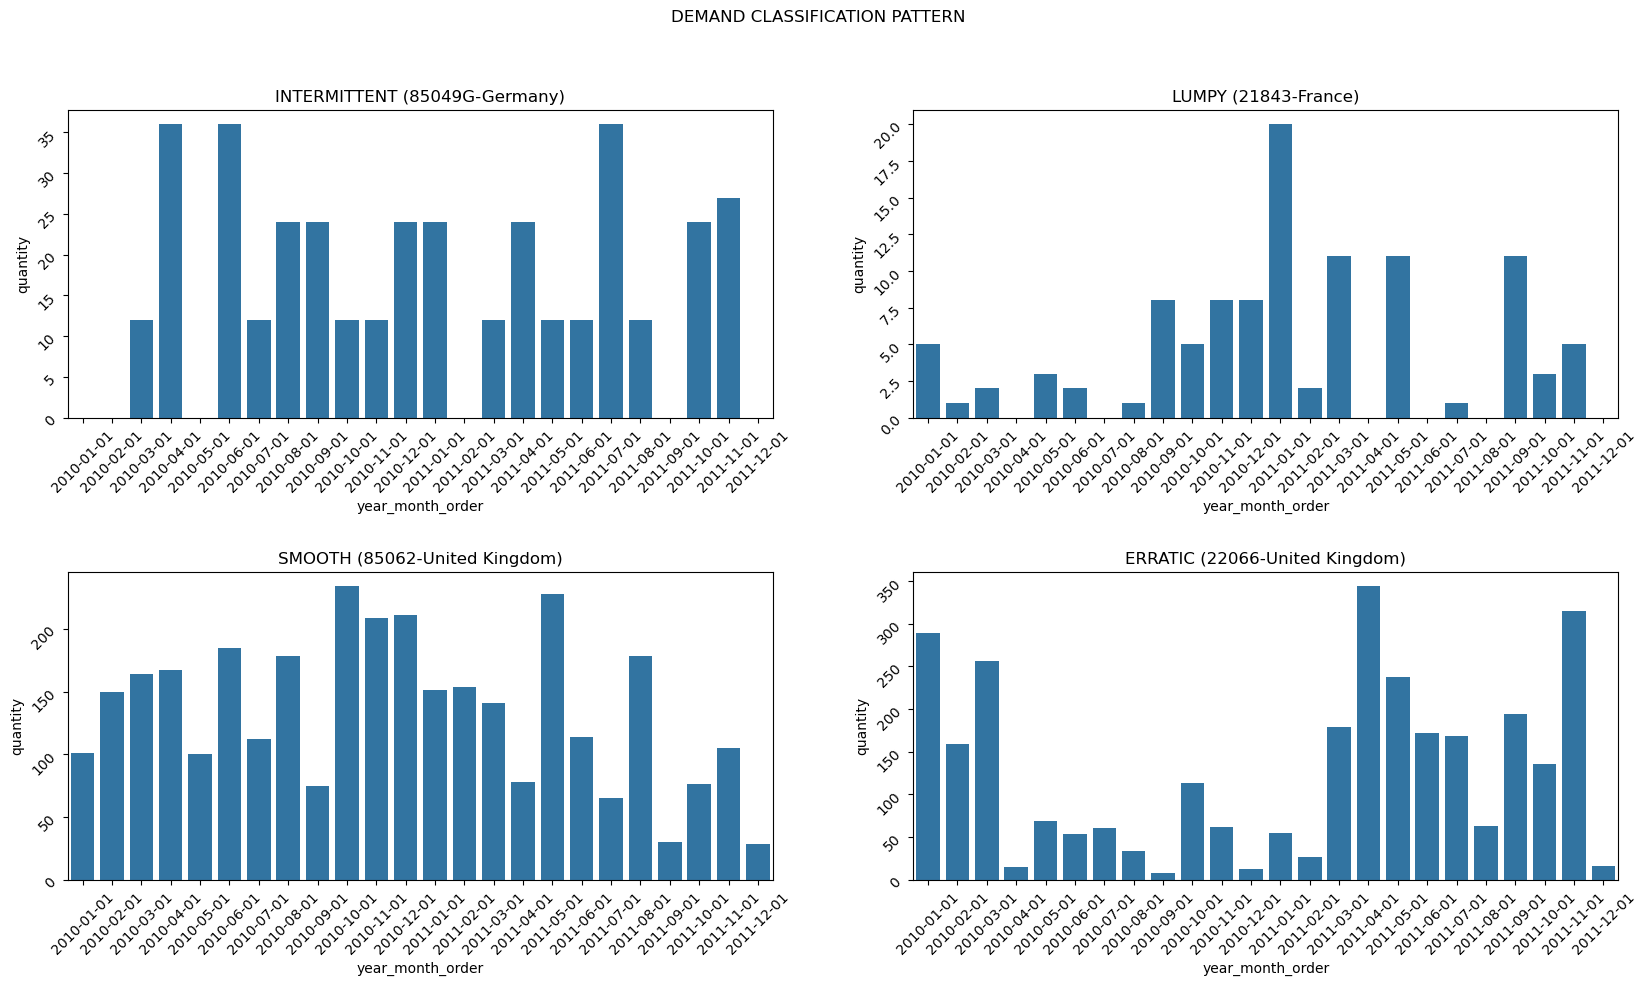

In [61]:
chart_demand_pattern(
    intermittent='85049G-Germany'
    , lumpy='21843-France'
    , smooth='85062-United Kingdom'
    , erratic='22066-United Kingdom'
)

__INSIGHT__ : 

1. From 27744 of Product & country combination (demand profile), there is Lumpy demand pattern that dominated the combination (72%) followed by Intermittent pattern with percantage around 22%.
2. Erratic & Smooth pattern (ideal pattern) only have 5.8% and 0.4% from total combination
3. One of example of combination product & country in every demand pattern are :

   1. Intermittent : __85049G-Germany__
   2. Lumpy : __21843-France__
   3. Smooth : __85062-United Kingdom__
   4. Erratic : __22066-United Kingdom__

4. Only Smooth & erratic demand pattern would be used for demand forecasting because those pattern have combination product & country that always purchased on every month from 2010 - 2011  

## EDA Conclusion

1. Revenue align with number of customer & quantity on every month, when the revenue increase, the number of customer & quantity also increase in certain month
2. Revenue & Number of Customer & Quantity Always increase Significantly on Q4 in every year (i.e. growth revenue in Q4 2010 = 73% & growth n_customer Q4 2010 = 29.5% & growth quantity Q4 2010 = 35.2%), Possibly because of Holiday Season (New Year & Christmas) so People go shopping more often
3. product_id DOT (__DOTCOM POSTAGE__) & 85123A (__HANGING HEART T-LIGHT HOLDER__) always purchased by customer in every year. Those products always contribute with high revenue (Top 5 Products). On 2009 the products gave almost 36,000 GBP and the number always increase every year up to 275,000 GBP in 2011, especially for __DOTCOM POSTAGE__ Product with 20% Growth from 2010 to 2011
4. UK always significantly have the highest revenue on every year. On 2009 UK revenue 750,317 GBP, Increased on 8,800,000 GBP on 2010. 2011 UK revenue is 8,300,000 GBP
5. DOT (__DOTCOM POSTAGE__), 85123A (__HANGING HEART T-LIGHT HOLDER__) & 22423 (__REGENCY CAKESTAND 3 TIER__) always on demand every month from 2010 until 2011 in UK that contribute with High revenue (Top 5)
6. Price for UK (Country that contribute the most to revenue) doesnt have a large number of price growth (in average of all products) for every month. the number of growth around +- 5%, Likewise the other 3 Countries (Germany, France and Ireland)
7. __DOTCOM POSTAGE__ Product give the Highest revenue on the end of the year from 2010 to 2011 in UK with value around 37,000 GBP each
8. There Are __685 Product & Country Combination (around 2.5% from all combination)__ that routinly purchased by customers every month from 2010 until 2011. In example __Product POST in Germany, Product POST in Spain, etc.__
9. Bucket 1 have the highest value compare to others (12750) which means there are __12750 Product & Country Combination__ that only in one month purchased by customer from 2010 until 2011, i.e. __Product gift_0001_70 in UK, POST in Canada, etc.__
10. From 27744 of Product & country combination (demand profile), there is Lumpy demand pattern that dominated the combination (72%) followed by Intermittent pattern with percantage around 22%. On the Other hand, Erratic & Smooth pattern (ideal pattern) only have 5.8% and 0.4% from total combination
11. Only Smooth & erratic demand pattern would be used for demand forecasting because those pattern have combination product & country that always purchased on every month from 2010 - 2011
12. Quantity with Price, Previous Price, & Previous Quantity have same pattern in every month, country & products. The higher quantity, the lower price (relatively). 

In [62]:
df[df['product_id'].isin(['84077','22197'])]

,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,order_status,revenue,year_order,year_quarter_order,year_month_order,quarter
550,489522,22197,"POPCORN HOLDER , SMALL",10,2009-12-01 11:45:00,0.85,15998.0,United Kingdom,SALE,8.50,2009,2009-10-01,2009-12-01,2009Q4
775,489536,22197,"POPCORN HOLDER , SMALL",1,2009-12-01 12:13:00,0.85,16393.0,United Kingdom,SALE,0.85,2009,2009-10-01,2009-12-01,2009Q4
983,489545,22197,"POPCORN HOLDER , SMALL",3,2009-12-01 12:22:00,0.85,17804.0,United Kingdom,SALE,2.55,2009,2009-10-01,2009-12-01,2009Q4
1309,489561,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2009-12-01 12:57:00,0.21,14654.0,United Kingdom,SALE,10.08,2009,2009-10-01,2009-12-01,2009Q4
1481,489572,22197,"POPCORN HOLDER , SMALL",2,2009-12-01 13:29:00,0.85,17611.0,United Kingdom,SALE,1.70,2009,2009-10-01,2009-12-01,2009Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066009,581492,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1,2011-12-09 10:03:00,0.63,nan,United Kingdom,SALE,0.63,2011,2011-10-01,2011-12-01,2011Q4
1066246,581492,22197,POPCORN HOLDER,34,2011-12-09 10:03:00,1.63,nan,United Kingdom,SALE,55.42,2011,2011-10-01,2011-12-01,2011Q4
1066746,581497,22197,POPCORN HOLDER,68,2011-12-09 10:23:00,2.46,nan,United Kingdom,SALE,167.28,2011,2011-10-01,2011-12-01,2011Q4
1067139,581538,22197,POPCORN HOLDER,4,2011-12-09 11:34:00,0.85,14446.0,United Kingdom,SALE,3.40,2011,2011-10-01,2011-12-01,2011Q4
